<a href="https://colab.research.google.com/github/123Prostab/EDA/blob/main/EDA_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Black Friday dataset EDA and feature engineering


In [110]:
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/archive (9).zip") as zipObj:
  zipObj.extractall("/content/drive/MyDrive/blackfriday")

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
#importing the dataset
df_train = pd.read_csv("/content/drive/MyDrive/blackfriday/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/blackfriday/test.csv")

In [113]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [114]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [115]:
df = df_test.append(df_train)

In [116]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [118]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [119]:
df.drop(["User_ID"],axis = 1, inplace=True)

In [120]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [121]:
pd.get_dummies(df["Gender"],drop_first= 1)

,M
0,1
1,1
2,0
3,0
4,0
...,...
550063,1
550064,0
550065,0
550066,0


In [122]:
#Handling catagorical feature Gender
df["Gender"]  =  df["Gender"].map({'M':1,'F': 0})

In [123]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN


In [124]:
#pd.get_dummies(df["Age"],drop_first= True)

In [125]:
df["Age"].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [126]:
df["Age"] = df["Age"].map({'0-17': 1, '18-25':2,'26-35' : 3 ,'36-45': 4,'46-50': 5 , '51-55': 6,'55+': 7})

In [127]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN


In [128]:
df_city = pd.get_dummies(df["City_Category"])

In [129]:
df_city

,A,B,C
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
550063,0,1,0
550064,0,0,1
550065,0,1,0
550066,0,0,1


In [130]:
df = pd.concat([df,df_city],axis = 1)

In [131]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN,0,1,0
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN,0,0,1
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN,0,1,0
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN,0,1,0
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN,0,0,1


In [132]:
df.drop('City_Category',axis = 1,inplace = True)

In [133]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00128942,1,5,7,2,1,1,11.0,NaN,NaN,0,1,0
1,P00113442,1,3,17,0,0,3,5.0,NaN,NaN,0,0,1
2,P00288442,0,4,1,4+,1,5,14.0,NaN,NaN,0,1,0
3,P00145342,0,4,1,4+,1,4,9.0,NaN,NaN,0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1


In [134]:
#missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [135]:
df.Product_Category_1.unique()

array([ 1,  3,  5,  4,  2, 10, 15, 18,  8, 13,  6, 11, 12,  7, 16, 14, 17,
        9, 20, 19])

In [136]:
df.Product_Category_2.unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [137]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [138]:
df.Product_Category_2.mode()[0]

8.0

In [139]:
df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])

In [140]:
df.Product_Category_2.isnull().sum()

0

In [141]:
df.Product_Category_3.mode()[0]

16.0

In [142]:
df.Product_Category_3 = df.Product_Category_3.fillna(df.Product_Category_3.mode()[0])

In [143]:
df.Product_Category_3.isnull().sum()

0

In [144]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
2,P00288442,0,4,1,4+,1,5,14.0,16.0,NaN,0,1,0
3,P00145342,0,4,1,4+,1,4,9.0,16.0,NaN,0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1


In [145]:
df.shape

(783667, 13)

In [146]:
df.Stay_In_Current_City_Years.unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [147]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.replace("+","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [148]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,0,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  uint8  
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [150]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(int)


In [151]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,0,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  uint8  
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [153]:
df["A"] = df["A"].astype(int)
df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int64  
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3),

In [155]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,0,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


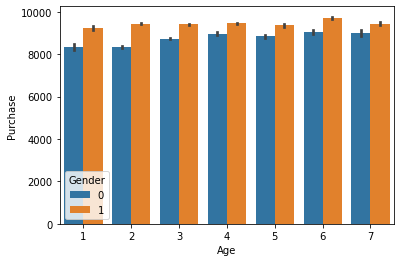

In [157]:
sns.barplot("Age","Purchase",hue = "Gender",data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


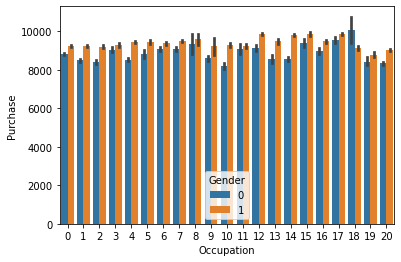

In [158]:
sns.barplot("Occupation","Purchase",hue = "Gender",data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


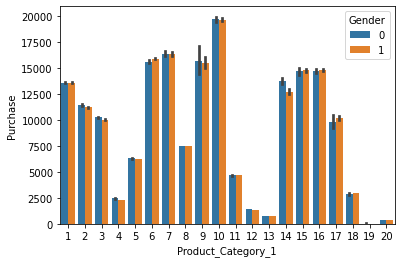

In [159]:
sns.barplot("Product_Category_1","Purchase",hue = "Gender",data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


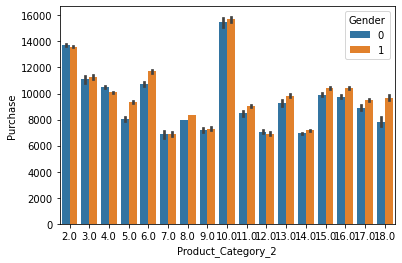

In [160]:
sns.barplot("Product_Category_2","Purchase",hue = "Gender",data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


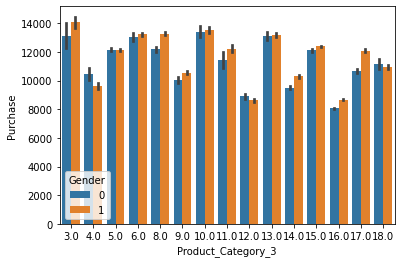

In [161]:
sns.barplot("Product_Category_3","Purchase",hue = "Gender",data = df)

In [ ]:
#Feature Scaling
